# K-Nearest Neighbour(KNN)
 The principle behind the nearest neighbour method is to find a predefined number of training samples closest in distance to the new pont,and predict the label from these

    It has one of the simplest learning strategies :given a new ,unknown observation,look up in your reference database which ones have the closest feature and assign the predominent class.
        
        The distance can , in general , be in any metric measure:standard euclidean distance is the most common choice.
            
            

# Digit Recognition

In [1]:
from sklearn.datasets import load_digits

digits=load_digits()

## features

In [2]:
x=digits.data
x.shape     #here x is just an nd array

(1797L, 64L)

In [3]:
import pandas as pd
df=pd.DataFrame(x)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# Labels

In [4]:
y=digits.target
y.shape

(1797L,)

# Split data into training and testing set

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)    #here this method just splits the data into the training and testing data

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf1=KNeighborsClassifier()


In [16]:
clf1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print 'clf1:',accuracy_score(y_test,clf1.predict(x_test))


clf1: 0.975


In [19]:
print 'testing score:',clf1.score(x_test,y_test)
print 'training score:',clf1.score(x_train,y_train)

testing score: 0.975
training score: 0.990257480863


In [21]:
test=1710
digits.target[test]

7

In [24]:
clf1.predict(digits.data[1710].reshape(1,-1))

array([7])

In [25]:
clf1.predict_proba(digits.data[1710].reshape(1,-1))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

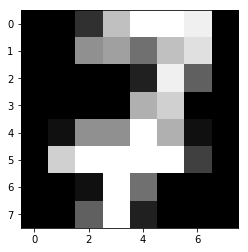

In [28]:
plt.imshow(digits.images[1710],cmap='gray')

In [30]:
#find value of k

for k in range(1,10):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    print 'for k=%d'%k
    print 'testing score:',clf.score(x_test,y_test)
    print 'training score:',clf.score(x_train,y_train)

for k=1
testing score: 0.988888888889
training score: 1.0
for k=2
testing score: 0.980555555556
training score: 0.989561586639
for k=3
testing score: 0.983333333333
training score: 0.990953375087
for k=4
testing score: 0.975
training score: 0.991649269311
for k=5
testing score: 0.975
training score: 0.990257480863
for k=6
testing score: 0.972222222222
training score: 0.990257480863
for k=7
testing score: 0.975
training score: 0.990953375087
for k=8
testing score: 0.975
training score: 0.989561586639
for k=9
testing score: 0.975
training score: 0.987473903967


In [32]:
clf1.score(x_test,y_test)

0.97499999999999998

In [34]:
pred=clf1.predict(x_test)

In [35]:
import numpy as np
np.mean(pred !=y_test)

0.025000000000000001

In [39]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(x,y)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

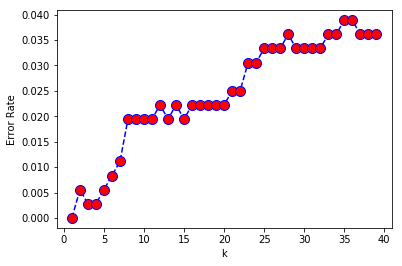

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()